# Task
Implement and train a feed-forward neural network with at least one hidden layer and a non-linear activation function to solve the XOR problem. The implementation should include training with backpropagation and gradient descent, and the final output should show the predicted outputs for all four XOR input pairs compared with the expected outputs.

## Problem setup

### Subtask:
Define the XOR input and output data.


**Reasoning**:
Define the XOR input and output data using NumPy arrays as instructed.




# XOR using a Deep Neural Network (library-based)

**Objective:** Build a neural network (using a library) that learns the XOR truth table.
This notebook uses **scikit-learn's MLPClassifier** (a library) to implement a small neural network.


In [2]:

# Imports and XOR data
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

# XOR dataset
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,1,1,0])
print("XOR inputs:\n", X)
print("XOR outputs:\n", y)


XOR inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
XOR outputs:
 [0 1 1 0]


- Build the MLP model (library)
- We'll use one hidden layer with 3 neurons (in recommended range 2-4).
- activation='tanh' for non-linearity in hidden layer; 'logistic' (sigmoid) used inside output via solver settings.
- Note: MLPClassifier uses softmax/logistic internally for output probabilities depending on settings.

In [3]:
model = MLPClassifier(hidden_layer_sizes=(3,), activation='tanh', solver='sgd', learning_rate_init=0.5, max_iter=10000, tol=1e-8, random_state=42, verbose=False)

# Train the model
model.fit(X, y)

print("Training finished.")
print("Number of iterations (epochs):", model.n_iter_)

Training finished.
Number of iterations (epochs): 5248


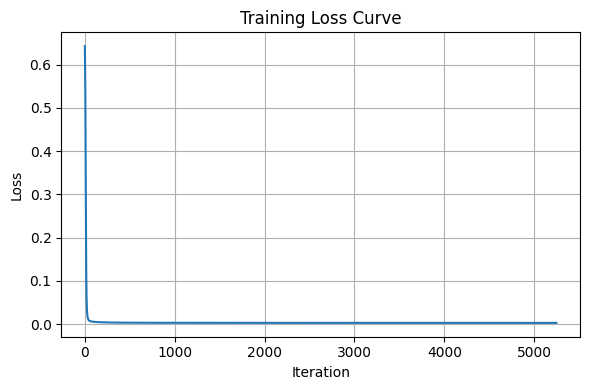


Inputs -> Predicted (prob) -> Predicted class -> Expected
(np.int64(0), np.int64(0)) -> 0.0004 -> 0 -> 0
(np.int64(0), np.int64(1)) -> 0.9995 -> 1 -> 1
(np.int64(1), np.int64(0)) -> 0.9995 -> 1 -> 1
(np.int64(1), np.int64(1)) -> 0.0005 -> 0 -> 0

All XOR outputs predicted correctly? True


In [4]:

# Plot training loss curve
plt.figure(figsize=(6,4))
plt.plot(model.loss_curve_)
plt.title('Training Loss Curve')
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.grid(True)
plt.tight_layout()
plt.show()

# Predictions and comparison
pred_proba = model.predict_proba(X)[:,1]  # probability for class 1
pred = model.predict(X)
print("\nInputs -> Predicted (prob) -> Predicted class -> Expected")
for xi, p, pr, e in zip(X, pred_proba, pred, y):
    print(f"{tuple(xi)} -> {p:.4f} -> {pr} -> {e}")

# Check if all correct
all_correct = np.array_equal(pred, y)
print('\nAll XOR outputs predicted correctly?', all_correct)
